In [61]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import normalize
from numpy import linalg as LA
import scipy.sparse as sparse

In [12]:
CFB2016_scores = pd.read_csv('/Users/earthaguo/Documents/Machine Learning Homework/HW5/CFB2016_scores.csv',header=None)
CFB2016_scores.columns = ['Team_A_Index','Team_A_Points','Team_B_Index','Team_B_Points']
CFB2016_scores

,Team_A_Index,Team_A_Points,Team_B_Index,Team_B_Points
0,510,24,72,20
1,343,33,160,29
2,97,17,161,23
3,709,37,355,14
4,301,10,685,15
5,163,34,164,30
6,94,51,266,31
7,246,16,46,9
8,249,13,49,36
9,415,37,67,64


In [13]:
teams = [line.rstrip() for line in open('/Users/earthaguo/Documents/Machine Learning Homework/HW5/TeamNames.txt')]
teams

['Abilene Christian',
 'Adams St',
 'Adrian',
 'Air Force',
 'Akron',
 'Alabama',
 'Alabama A&M',
 'Alabama St',
 'Albany NY',
 'Albany St GA',
 'Albion',
 'Albright',
 'Alcorn St',
 'Alderson Broaddus',
 'Alfred',
 'Alfred St',
 'Allegheny',
 'Alma',
 "American Int'l",
 'Amherst',
 'Anderson',
 'Angelo St',
 'Anna Maria',
 'Appalachian St',
 'Apprentice',
 'Arizona',
 'Arizona Christian',
 'Arizona St',
 'Arkansas',
 'Arkansas St',
 'Arkansas Tech',
 'Arkansas-Monticello',
 'Arkansas-Pine Bluff',
 'Army',
 'Ashland',
 'Assumption',
 'Auburn',
 'Augsburg',
 'Augustana IL',
 'Augustana SD',
 'Aurora',
 'Austin',
 'Austin Peay',
 'Ave Maria',
 'Averett',
 'Avila',
 'Azusa Pacific',
 'Bacone',
 'Baker',
 'Baldwin Wallace',
 'Ball St',
 'Bates',
 'Baylor',
 'Becker',
 'Belhaven',
 'Beloit',
 'Bemidji St',
 'Benedict',
 'Benedictine IL',
 'Benedictine KS',
 'Bentley',
 'Berry',
 'Bethany KS',
 'Bethany WV',
 'Bethel KS',
 'Bethel MN',
 'Bethel TN',
 'Bethune-Cookman',
 'Birmingham-Southern'

In [14]:
teams_df = pd.DataFrame(teams)
teams_df.columns = ['Team_name']
teams_df

,Team_name
0,Abilene Christian
1,Adams St
2,Adrian
3,Air Force
4,Akron
5,Alabama
6,Alabama A&M
7,Alabama St
8,Albany NY
9,Albany St GA


In [15]:
M = np.zeros((760,760))
M = np.matrix(M)
M.shape

(760, 760)

In [16]:
CFB2016_scores

,Team_A_Index,Team_A_Points,Team_B_Index,Team_B_Points
0,510,24,72,20
1,343,33,160,29
2,97,17,161,23
3,709,37,355,14
4,301,10,685,15
5,163,34,164,30
6,94,51,266,31
7,246,16,46,9
8,249,13,49,36
9,415,37,67,64


In [17]:
# No rows contain the same scroe
same_score = []
for i in range(0,4197):
    if CFB2016_scores.iloc[i,1] == CFB2016_scores.iloc[i,3]:
        same_score.append(i)
same_score

[]

In [18]:
CFB2016_scores.iloc[0,3]

20

In [19]:
# Fill in the M matrix 
for i in range(0,4197):
    A_location = CFB2016_scores.iloc[i,0]-1
    B_location = CFB2016_scores.iloc[i,2]-1
    A_score = CFB2016_scores.iloc[i,1]
    B_score = CFB2016_scores.iloc[i,3]
    
    if A_score > B_score:
        M[A_location,A_location] = M[A_location,A_location] + 1 + A_score/(A_score+B_score)
    else: 
         M[A_location,A_location] = M[A_location,A_location] + A_score/(A_score+B_score)
    
    
    if A_score < B_score:
        M[B_location,B_location] = M[B_location,B_location] + 1 + B_score/(A_score+B_score)
    else:
        M[B_location,B_location] = M[B_location,B_location] + B_score/(A_score+B_score)
        
    
    if A_score < B_score:
        M[A_location,B_location] = M[A_location,B_location] + 1 + B_score/(A_score+B_score)
    else: 
        M[A_location,B_location] = M[A_location,B_location] + B_score/(A_score+B_score)
        
    if A_score > B_score:
        M[B_location,A_location] = M[B_location,A_location] + 1 + A_score/(A_score+B_score)
    else:
        M[B_location,A_location] = M[B_location,A_location] + A_score/(A_score+B_score)
    
    

In [20]:
M.shape

(760, 760)

In [21]:
M_Row_Normalized = normalize(M, norm='l1', axis=1)
M_Row_Normalized

array([[ 0.29270532,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.29220916,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.42735938, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.54399721,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.34009513,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.65548629]])

In [22]:
Wo = [1/760]*760
Wo = np.matrix(Wo)
Wo.shape

(1, 760)

In [23]:

i = np.array([[1, 2,3], [4,5,6],[3,5,7]])
i

array([[1, 2, 3],
       [4, 5, 6],
       [3, 5, 7]])

In [24]:
LA.matrix_power(i, 3)

array([[ 234,  351,  468],
       [ 546,  819, 1092],
       [ 572,  858, 1144]])

In [25]:
a = np.dot(i,i)

In [26]:
np.dot(a,i)

array([[ 234,  351,  468],
       [ 546,  819, 1092],
       [ 572,  858, 1144]])

In [44]:
# t = 10
M_power10 = LA.matrix_power(M_Row_Normalized, 10)

In [45]:
Wt_10 = np.dot(Wo, M_power10)


In [46]:
# t = 100

M_power100 = LA.matrix_power(M_Row_Normalized, 100)
Wt_100 = np.dot(Wo, M_power100)

In [47]:
# t = 1000

M_power1000 = LA.matrix_power(M_Row_Normalized, 1000)
Wt_1000 = np.dot(Wo, M_power1000)


In [48]:
# t = 10000

M_power10000 = LA.matrix_power(M_Row_Normalized, 10000)
Wt_10000 = np.dot(Wo, M_power10000)


In [49]:
Wt_10.shape

(1, 760)

In [50]:
Wt_10_df = pd.DataFrame(np.transpose(Wt_10))
Wt_10_df.columns = ['Values']
Wt_10_df

,Values
0,0.000284
1,0.000311
2,0.000517
3,0.002377
4,0.000491
5,0.012412
6,0.000185
7,0.000234
8,0.001237
9,0.000961


In [51]:
se = pd.Series(teams)
Wt_10_df['Teams'] = se.values

In [52]:
Wt_10_df

,Values,Teams
0,0.000284,Abilene Christian
1,0.000311,Adams St
2,0.000517,Adrian
3,0.002377,Air Force
4,0.000491,Akron
5,0.012412,Alabama
6,0.000185,Alabama A&M
7,0.000234,Alabama St
8,0.001237,Albany NY
9,0.000961,Albany St GA


In [53]:
Wt_10_df = Wt_10_df[['Teams','Values']]
Wt_10_df

,Teams,Values
0,Abilene Christian,0.000284
1,Adams St,0.000311
2,Adrian,0.000517
3,Air Force,0.002377
4,Akron,0.000491
5,Alabama,0.012412
6,Alabama A&M,0.000185
7,Alabama St,0.000234
8,Albany NY,0.001237
9,Albany St GA,0.000961


In [54]:
Wt_10_df_sorted = Wt_10_df.sort('Values', ascending=False)
Wt_10_df_sorted

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Teams,Values
370,Mary Hardin-Baylor,0.014752
440,NW Missouri St,0.013151
5,Alabama,0.012412
133,Clemson,0.011029
668,UW-Oshkosh,0.009925
608,St Thomas,0.008178
673,UW-Whitewater,0.008168
598,St Francis IN,0.008098
435,Mount Union,0.007755
299,James Madison,0.007428


In [55]:
Wt_10_df_sorted_25 = Wt_10_df_sorted.head(n=25)
Wt_10_df_sorted_25

,Teams,Values
370,Mary Hardin-Baylor,0.014752
440,NW Missouri St,0.013151
5,Alabama,0.012412
133,Clemson,0.011029
668,UW-Oshkosh,0.009925
608,St Thomas,0.008178
673,UW-Whitewater,0.008168
598,St Francis IN,0.008098
435,Mount Union,0.007755
299,James Madison,0.007428


In [56]:
Wt_10_df_sorted_25_complete = Wt_10_df_sorted_25.reset_index(drop=True)
Wt_10_df_sorted_25_complete
Wt_10_df_sorted_25_complete.index = Wt_10_df_sorted_25_complete.index + 1
Wt_10_df_sorted_25_complete.columns = ['When t = 10, Teams','Values']
Wt_10_df_sorted_25_complete

,"When t = 10, Teams",Values
1,Mary Hardin-Baylor,0.014752
2,NW Missouri St,0.013151
3,Alabama,0.012412
4,Clemson,0.011029
5,UW-Oshkosh,0.009925
6,St Thomas,0.008178
7,UW-Whitewater,0.008168
8,St Francis IN,0.008098
9,Mount Union,0.007755
10,James Madison,0.007428


In [57]:
Wt_100_df = pd.DataFrame(np.transpose(Wt_100))
Wt_100_df.columns = ['Values']
se = pd.Series(teams)
Wt_100_df['When t = 100, Teams'] = se.values
Wt_100_df = Wt_100_df[['When t = 100, Teams','Values']]
Wt_100_df_sorted = Wt_100_df.sort('Values', ascending=False)
Wt_100_df_sorted_25 = Wt_100_df_sorted.head(n=25)
Wt_100_df_sorted_25_complete = Wt_100_df_sorted_25.reset_index(drop=True)
Wt_100_df_sorted_25_complete.index = Wt_100_df_sorted_25_complete.index + 1
Wt_100_df_sorted_25_complete

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,"When t = 100, Teams",Values
1,NW Missouri St,0.038258
2,Alabama,0.033364
3,Clemson,0.032988
4,Mary Hardin-Baylor,0.030883
5,UW-Oshkosh,0.016844
6,UW-Whitewater,0.012160
7,Florida St,0.010444
8,Grand Valley St,0.010261
9,John Carroll,0.010246
10,Ohio State,0.009941


In [58]:
# t = 1000
Wt_1000_df = pd.DataFrame(np.transpose(Wt_1000))
Wt_1000_df.columns = ['Values']
se = pd.Series(teams)
Wt_1000_df['When t = 1000, Teams'] = se.values
Wt_1000_df = Wt_1000_df[['When t = 1000, Teams','Values']]
Wt_1000_df_sorted = Wt_1000_df.sort('Values', ascending=False)
Wt_1000_df_sorted_25 = Wt_1000_df_sorted.head(n=25)
Wt_1000_df_sorted_25_complete = Wt_1000_df_sorted_25.reset_index(drop=True)
Wt_1000_df_sorted_25_complete.index = Wt_1000_df_sorted_25_complete.index + 1
Wt_1000_df_sorted_25_complete

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,"When t = 1000, Teams",Values
1,Alabama,0.060719
2,Clemson,0.060408
3,NW Missouri St,0.030495
4,Florida St,0.018814
5,Ohio State,0.017983
6,Washington,0.015889
7,Virginia Tech,0.015824
8,Michigan,0.014827
9,Pittsburgh,0.014651
10,Oklahoma,0.014390


In [59]:
# t = 10000
Wt_10000_df = pd.DataFrame(np.transpose(Wt_10000))
Wt_10000_df.columns = ['Values']
se = pd.Series(teams)
Wt_10000_df['When t = 10000, Teams'] = se.values
Wt_10000_df = Wt_10000_df[['When t = 10000, Teams','Values']]
Wt_10000_df_sorted = Wt_10000_df.sort('Values', ascending=False)
Wt_10000_df_sorted_25 = Wt_10000_df_sorted.head(n=25)
Wt_10000_df_sorted_25_complete = Wt_10000_df_sorted_25.reset_index(drop=True)
Wt_10000_df_sorted_25_complete.index = Wt_10000_df_sorted_25_complete.index + 1
Wt_10000_df_sorted_25_complete

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,"When t = 10000, Teams",Values
1,Alabama,0.067282
2,Clemson,0.066983
3,Florida St,0.020835
4,Ohio State,0.019922
5,Washington,0.017579
6,Virginia Tech,0.017524
7,Michigan,0.016426
8,NW Missouri St,0.016342
9,Pittsburgh,0.016235
10,Oklahoma,0.015922


In [213]:
M_transpose = np.transpose(M_Row_Normalized)


In [214]:
e_values, e_vectors = sparse.linalg.eigs(M_transpose, k=1)

In [215]:
e_vectors.shape

(760, 1)

In [216]:
print(np.transpose(e_vectors.real))

[[  2.02665793e-03   3.10486124e-04   5.05921121e-05   3.56705990e-02
    7.19071163e-03   4.55024913e-01   4.47820092e-04   5.86977730e-04
    6.46948764e-03   3.22680232e-04   2.24883480e-05   2.55820489e-04
    1.50171248e-03   6.06885063e-04   4.60169274e-04   3.73111612e-06
    1.25114910e-05   6.48867350e-05   1.10036923e-04   5.54235727e-02
    1.16415751e-05   1.34529466e-03   1.31180860e-06   4.08131235e-02
    1.55383486e-05   1.21222327e-02   2.13260750e-04   1.76254012e-02
    4.87821333e-02   2.53412696e-02   1.40264565e-03   8.48364568e-04
    2.17826181e-04   2.30397542e-02   1.47991873e-02   7.38174619e-04
    8.09726110e-02   2.45240288e-05   7.94574758e-05   2.89998817e-03
    4.64964550e-05   4.09448169e-05   1.71653600e-03   1.77897087e-05
    5.19415596e-05   4.35354902e-05   2.86476159e-03   4.17686203e-05
    2.33542640e-03   8.98123084e-05   6.31758574e-03   2.81202866e-02
    3.43058427e-02   6.47893979e-06   1.41388205e-04   1.19903319e-05
    4.97705832e-03  

In [217]:
e_vector_sum = np.sum(e_vectors)
e_vector_sum 

(7.6867339253950844+0j)

In [218]:
w_infinity = np.divide(np.transpose(e_vectors), e_vector_sum )

In [219]:
w_infinity.shape

(1, 760)

In [220]:
# abs(np.matrix(Wt_100_df['Values'])-np.matrix(Wt_10_df['Values'])).sum()

In [221]:
# manhattan_distances(np.matrix(Wt_100_df['Values']),np.matrix(Wt_10_df['Values']))

In [222]:
Wo.shape

(1, 760)

In [223]:
M_Row_Normalized.shape

(760, 760)

In [224]:
# Calculate the manhattan distance

Wt_bag = []
for i in range(1,10001):
    
    if i == 1:
        value = np.dot(Wo,M_Row_Normalized)
        Wt_bag.append(value)
        
    else:
        value = np.dot(value,M_Row_Normalized)
        Wt_bag.append(value)
    


In [225]:
len(Wt_bag)

10000

In [226]:
w_infinity.shape

(1, 760)

In [227]:
Wt_bag[0].shape

(1, 760)

In [104]:
# M_Row_Normalized[0]

In [123]:
# Wt_bag

In [105]:
manhattan_d = []
for i in range(0,10000):
    distance = abs(Wt_bag[i]-w_infinity).sum()
    manhattan_d.append(distance)

In [228]:
manhattan_d = []
for i in range(0,10000):
    distance = manhattan_distances(Wt_bag[i],w_infinity)
    manhattan_d.append(distance)

//anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


1.2847193124973615

In [229]:
hahadistance = []
for i in range(0,10000):
    hahadistance.append(manhattan_d[i][0][0])

In [230]:
t = []
for i in range(1,10001):
    t.append(i)

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


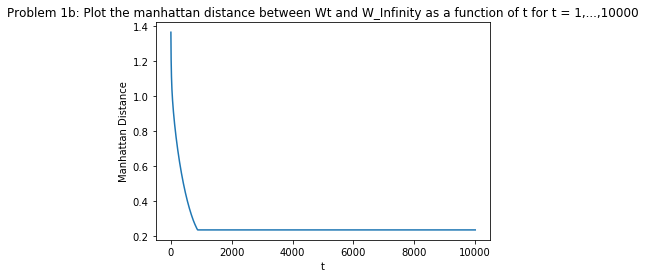

In [231]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


plot(t, hahadistance)



plt.title('Problem 1b: Plot the manhattan distance between Wt and W_Infinity as a function of t for t = 1,...,10000')
plt.xlabel('t')
plt.ylabel('Manhattan Distance')


plt.legend()

plt.show()

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


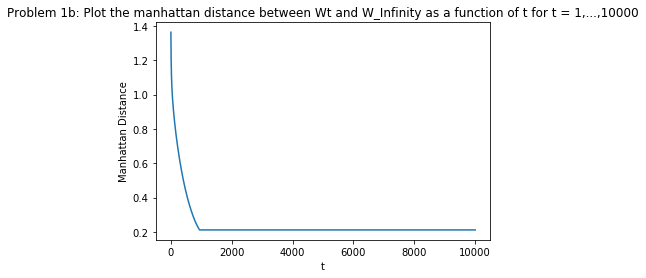

In [173]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


plot(t, hahadistance)



plt.title('Problem 1b: Plot the manhattan distance between Wt and W_Infinity as a function of t for t = 1,...,10000')
plt.xlabel('t')
plt.ylabel('Manhattan Distance')


plt.legend()

plt.show()

//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


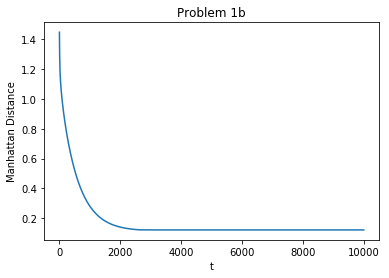

In [202]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


plot(t, hahadistance)



plt.title('Problem 1b')
plt.xlabel('t')
plt.ylabel('Manhattan Distance')


plt.legend()

plt.show()

In [156]:
### try the l2 distance

l2_d = []
for i in range(0,10000):

    distance2 = np.sqrt(np.sum((np.array(Wt_bag[i])-np.array(np.transpose(w_infinity)))**2))
    l2_d.append(distance2)

//anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
//anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


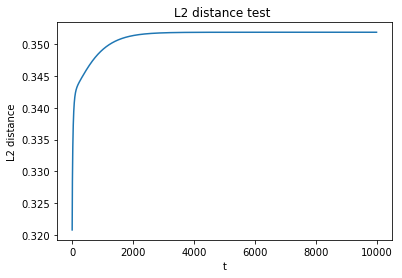

In [158]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


plot(t, l2_d)



plt.title('L2 distance test ')
plt.xlabel('t')
plt.ylabel('L2 distance')


plt.legend()

plt.show()